In [1]:
!unzip datos.zip

import pandas as pd
#1.1
accidentes=pd.read_csv("accidentes.csv")
vehiculos=pd.read_csv("vehiculos.csv")



1.2



unzip:  cannot find or open datos.zip, datos.zip.zip or datos.zip.ZIP.


1.2

In [2]:
#1.2
#primero debemos detectar todos los espacios en blanco
import pandas as pd

#Para este caso, borre todo el codigo que tenia anteriormente en la parte 1 debido a
#que tenia un error que reemplazaba numeros en columnas de str y str en columnas numericas,
#por lo que voy a hacerlo de una forma mas tediosa pero eficiente

columna_con_blancos_acc = accidentes.columns[accidentes.isnull().any()].tolist()
print(f"Columnas con espacios en blanco en 'accidentes': {columna_con_blancos_acc}")

columna_con_blancos_veh = vehiculos.columns[vehiculos.isnull().any()].tolist()
print(f"Columnas con espacios en blanco en 'vehiculos': {columna_con_blancos_veh}")



Columnas con espacios en blanco en 'accidentes': ['2nd_Road_Class', '2nd_Road_Number', 'Carriageway_Hazards', 'Latitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Special_Conditions_at_Site', 'Speed_limit', 'Time', 'InScotland']
Columnas con espacios en blanco en 'vehiculos': ['Age_of_Vehicle', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.', 'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'make', 'model', 'Propulsion_Code', 'Skidding_and_Overturning', 'Vehicle_Location.Restricted_Lane']


In [3]:
#1.2

accidentes["2nd_Road_Class"]=accidentes["2nd_Road_Class"].fillna(value="none")
accidentes["2nd_Road_Number"]=accidentes["2nd_Road_Number"].fillna(value="none")
accidentes["Location_Easting_OSGR"]=accidentes["Location_Easting_OSGR"].fillna(value=0.0)
accidentes["Location_Northing_OSGR"]=accidentes["Location_Northing_OSGR"].fillna(value=0.0)
accidentes["Longitude"]=accidentes["Longitude"].fillna(value=0.0)
accidentes["Latitude"]=accidentes["Latitude"].fillna(value=0.0)
accidentes["Pedestrian_Crossing-Human_Control"]=accidentes["Pedestrian_Crossing-Human_Control"].fillna(value="none")
accidentes["Pedestrian_Crossing-Physical_Facilities"]=accidentes["Pedestrian_Crossing-Physical_Facilities"].fillna(value=0.0)
accidentes["Special_Conditions_at_Site"]=accidentes["Special_Conditions_at_Site"].fillna(value="none")
accidentes["Speed_limit"]=accidentes["Speed_limit"].fillna(value=0.0)
accidentes["Time"]=accidentes["Time"].fillna(value=0.0)
accidentes["InScotland"]=accidentes["InScotland"].fillna(value="NO")


In [4]:
import pandas as pd
#Ahora hacemos lo mismo para las columnas de vehiculos
vehiculos["Age_of_Vehicle"]=vehiculos["Age_of_Vehicle"].fillna(value=0.0)
vehiculos["Driver_Home_Area_Type"]=vehiculos["Driver_Home_Area_Type"].fillna(value="none")
vehiculos["Hit_Object_in_Carriageway"]=vehiculos["Hit_Object_in_Carriageway"].fillna(value="Desconocido")
vehiculos["Hit_Object_off_Carriageway"]=vehiculos["Hit_Object_off_Carriageway"].fillna(value="Desconocido")
vehiculos["make"]=vehiculos["make"].fillna(value="Desconocido")
vehiculos["model"]=vehiculos["model"].fillna(value="Desconocido")
vehiculos["Propulsion_Code"]=vehiculos["Propulsion_Code"].fillna(value="Desconocido")
vehiculos["Skidding_and_Overturning"]=vehiculos["Skidding_and_Overturning"].fillna(value="Desconocido")
vehiculos["Engine_Capacity_.CC."]=vehiculos["Engine_Capacity_.CC."].fillna(value=0.0)
vehiculos["Vehicle_Location.Restricted_Lane"]=vehiculos["Vehicle_Location.Restricted_Lane"].fillna(value="Desconocido")


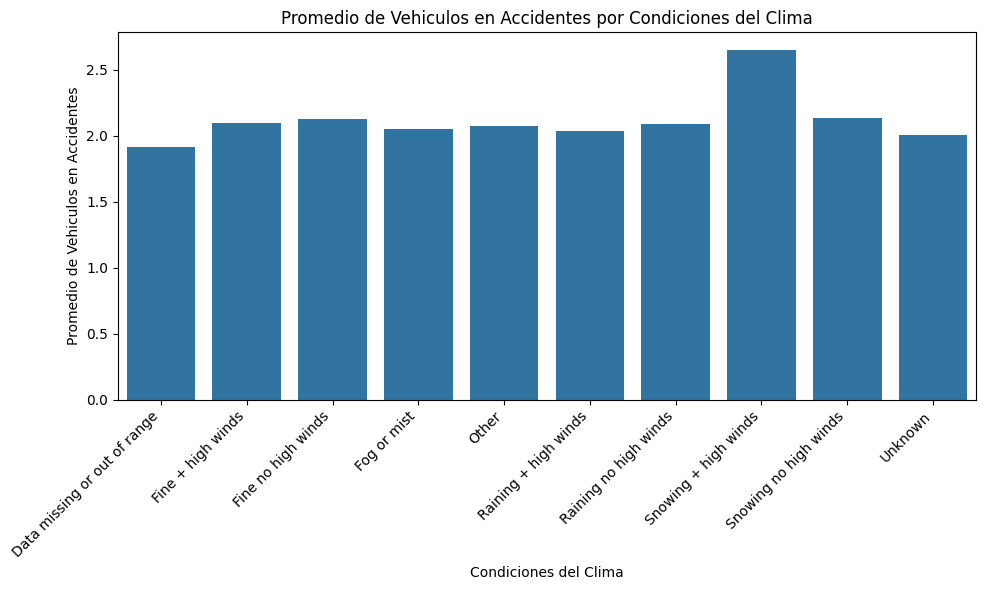

In [5]:
#2.1:))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#aca con pd.merge combinamos ambos accidentes y vehiculos con la columna accident_index, lo cual se almacena en mergi, algo que siempre vamos a usar
mergi=pd.merge(accidentes,vehiculos,on="Accident_Index")
#aca calculamos el promedio de vehiculos por condicion climatica, agrupamos los datos por la columna de weather
#conditions con la columna number of vehicles para calcular y mean para sacar el promedio
promvehiculos_porclima=mergi.groupby("Weather_Conditions")["Number_of_Vehicles"].mean()

#Aca creamos un grafico de barras, con el eje y siendo el promedio de vehiculos en accidentes y el eje x el clima
#al principio me printeaba el mismo grafico pero las condiciones de clima se tapaban unas a ellas porque estaban muy juntas,
#por lo que le pregunte a la IA como separarlos y me recomendo usar plt.xticks y rotarlo del eje x patra que se vea todo
#le pondre a todos los graficos el mismo porte de 10,6
plt.figure(figsize=(10,6))
sns.barplot(x=promvehiculos_porclima.index,y=promvehiculos_porclima.values)
plt.xlabel("Condiciones del Clima")
plt.ylabel("Promedio de Vehiculos en Accidentes")
plt.title("Promedio de Vehiculos en Accidentes por Condiciones del Clima")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#A base del grafico ´podemos ver que la condicion climatica que mas se relaciona con accidentes de vehiculos es
#"Snowing+high winds" lo cual hace sentido ya que es una condicion que hace muy dificil el manej0o seguro.
#Luego las condiciones de snowing+high winds y finde no high winds presentan alrededor de la misma cantidad de
#vehiculos en accidentes.

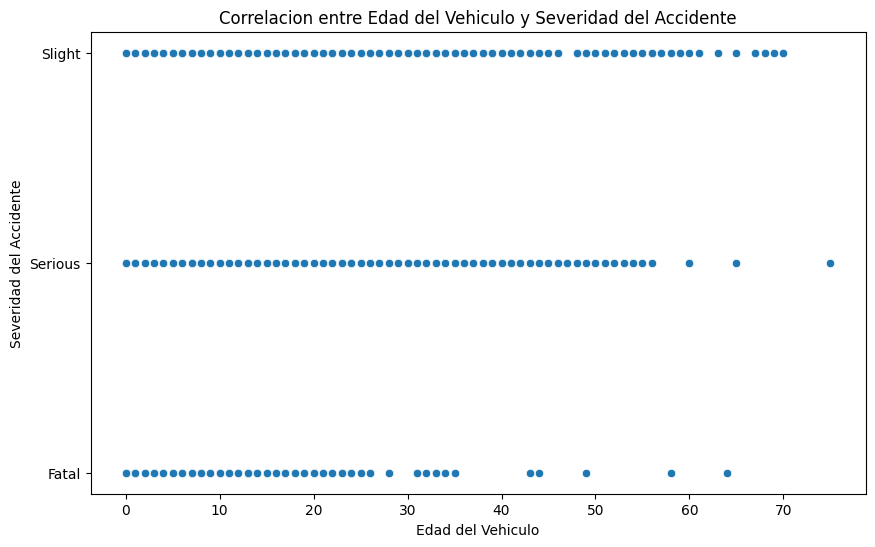

0.011193021573134326


In [6]:
#2.2:))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mergi=pd.merge(accidentes,vehiculos,on="Accident_Index")

#convertiremos la severidad a una escala numerica
sev_map={"Slight":1,"Serious":2,"Fatal":3}
mergi["Accident_Severity_Num"]=mergi["Accident_Severity"].map(sev_map)

#calculamos la edad promedio del auto para cada accidente
mergi.groupby("Accident_Severity")["Age_of_Vehicle"].mean()


#creamos el grafico
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age_of_Vehicle",y="Accident_Severity",data=mergi)
plt.xlabel("Edad del Vehiculo")
plt.ylabel("Severidad del Accidente")
plt.title("Correlacion entre Edad del Vehiculo y Severidad del Accidente")
plt.show()
#calculamos la cofrrelacion para apoyarnos en el analisis del grafico
corr=mergi["Age_of_Vehicle"].corr(mergi["Accident_Severity_Num"])
print(corr)

#A mera vista no se ve ninguna correlacion clara entre la edad del vehiculo y la severidad del accidente
#los accidentes fatales son los menos frecuentes, luego los serious y los mas ocurrentes son los slight
#y a base de la correlacion calculada que es 0,01 no hay relacion. Por lo comprobamos numericamente y visualmente que no hay relacion directa



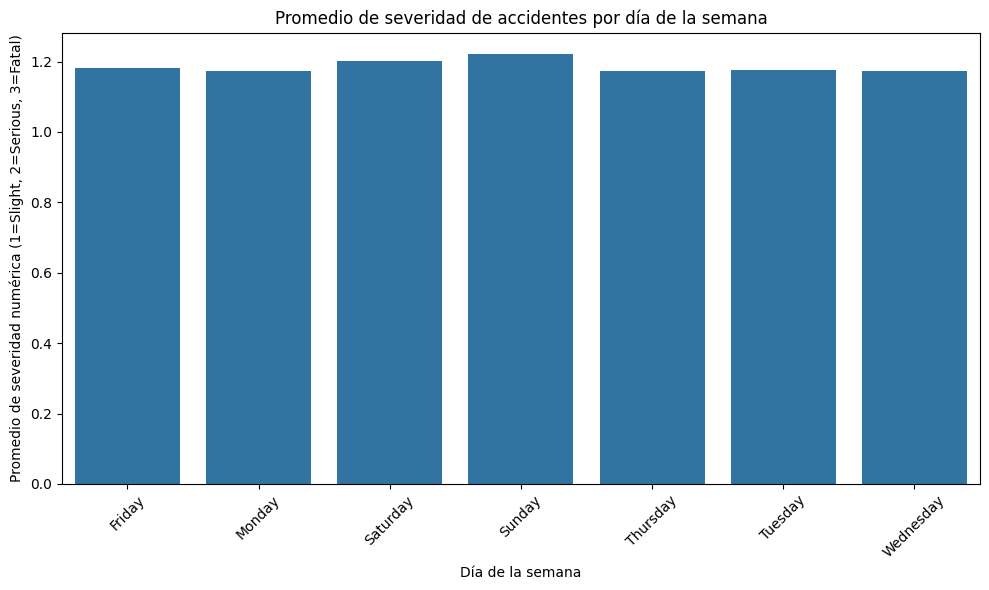

In [7]:
#2.3 :))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Para este caso estuve mucho rato buscando mi error, debido a que me respondia un grafico pero vacio,
#lo cual yo no entendia y pense que era problema de 1.2 y lo cambie pero seguia igual,
#por lo que le pregunte a la IA mandandole mi codigo y que el grafico estaba vacio por lo que me recomendo
#agregar estas primeras lineas que convierten cualquier none en pd.NA que parece que es lo mejor para pandas,
#y lo hace que no se confunda
for col in accidentes.columns:
    if accidentes[col].dtype == 'object':
        accidentes[col] = accidentes[col].replace('none', pd.NA)

# convertimos Date en formato fecha, usamor errors=coerce para que no se complique con los datos inconvertibles y los pase
accidentes["Date"] = pd.to_datetime(accidentes["Date"], errors='coerce')

# Sacamos el dia de semana de este
accidentes["Day_Of_Week"] = accidentes["Date"].dt.day_name()

# luego convertimos la severidad del accidente a numerica con map
sev_map = {"Slight": 1, "Serious": 2, "Fatal": 3}
accidentes["Accident_Severity_Num"] = accidentes["Accident_Severity"].map(sev_map)

# calculamos el promedio de severidad por dia de semana
prom_sev = accidentes.groupby("Day_Of_Week")["Accident_Severity_Num"].mean()

#se crea el grafico de barras con el eje x como los dias y el y los valores
# Dibujo del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=prom_sev.index, y=prom_sev.values)
plt.title("Promedio de severidad de accidentes por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Promedio de severidad numérica (1=Slight, 2=Serious, 3=Fatal)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# A base del grafico, se puede ver que, en promedio, los accidentes mas severos de la semana
#pasan los dias domingo, luego los sabados y luego los viernes. Los cuales son dias de eventos, juntas,
#sean familiares o sociales, esto se puede deber a un aumento en gente que maneja ebria. Los accidentes fatales son muy poco recurrentes por lo que no se ven en el promedio

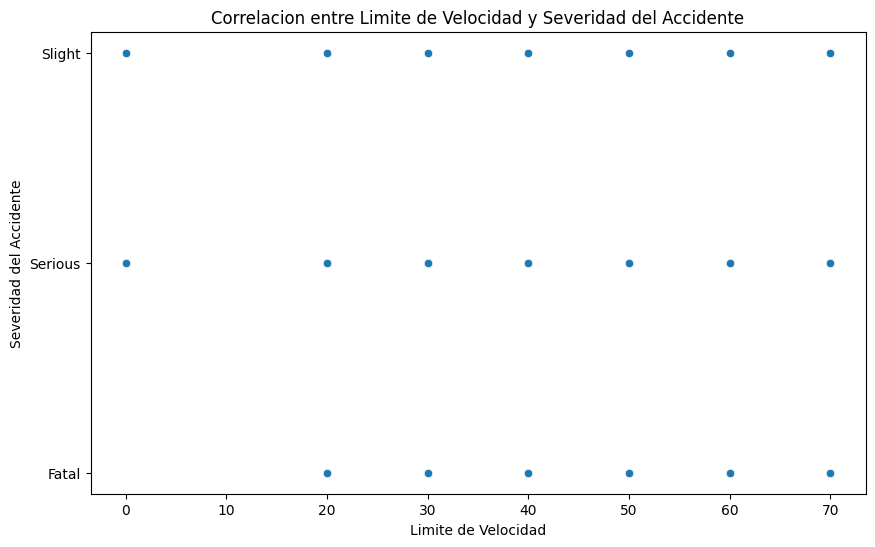

0.10001871469691198


In [8]:
#2.4 :))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mergi=pd.merge(accidentes,vehiculos,on="Accident_Index")

#igual que antes, debemos convertir la severidad a numerica
sev_map={"Slight":1,"Serious":2,"Fatal":3}
mergi["Accident_Severity_Num"]=mergi["Accident_Severity"].map(sev_map)


plt.figure(figsize=(10,6))
sns.scatterplot(x="Speed_limit",y="Accident_Severity",data=mergi)
plt.xlabel("Limite de Velocidad")
plt.ylabel("Severidad del Accidente")
plt.title("Correlacion entre Limite de Velocidad y Severidad del Accidente")
plt.show()

#Fuera del grafico, tambien calcularemos la correlacion para comprobar que si hay relacion como se ve en el grafico
corr=mergi["Speed_limit"].corr(mergi["Accident_Severity_Num"])
print(corr)

#ya teniendo el grafico y la correlacion, podemos ver qiue no hay una relacion significativa entre
#la severidad del accidente con el limite de velocidad debido a que en el grafico se ve una distribucion
#uniforme de los tipos de severidad a lo largo de las velocidades, y no se ve ninguna tendencia, como
#concentracion de severidad a altos limitexs, Ademas que la correlacion es 0,1, lo cual no indica que haya mucha

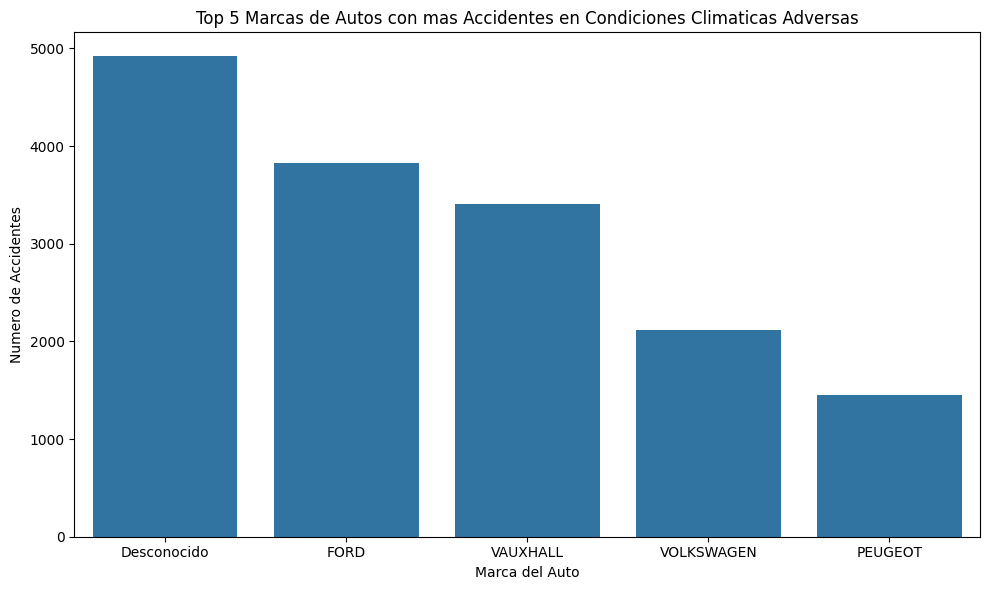

make
Desconocido    4919
FORD           3827
VAUXHALL       3402
VOLKSWAGEN     2121
PEUGEOT        1456
Name: count, dtype: int64


In [9]:
#2.5:)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Primero, ya que nos piden ver las marcas de autos junto con accidentes en condiciones climaticas adversas,
#debemos fusionar accidentes con vehiculos
mergi=pd.merge(accidentes,vehiculos,on="Accident_Index")

#Seleccionamos las condiciones climaticas adversas en base de lo que creo y lo que nos indico el grafico del 2.1
#en donde salian los climas con mas vehiculos en accidentes
condiciones_adversas=["Raining no high winds",'Fog or mist','Snowing no high winds','Raining + high winds','Fine + high winds','Snowing + high winds']
#aca filtramos los datos para q esten solo los accidentes en estas condiciones adversas
accidentes_climadverso=mergi[mergi["Weather_Conditions"].isin(condiciones_adversas)]

top5marcas=accidentes_climadverso["make"].value_counts().head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top5marcas.index,y=top5marcas.values)
plt.title("Top 5 Marcas de Autos con mas Accidentes en Condiciones Climaticas Adversas")
plt.xlabel("Marca del Auto")
plt.ylabel("Numero de Accidentes")
plt.tight_layout()
plt.show()
print(top5marcas)
#aca podemos ver que fuera de las marcas desconocidas, las marcas con mayor numero de accidentes son:
#Ford, Vauxhall, Volkswagen y Peugeot. Fuera de las marcas no registradas que ganan.

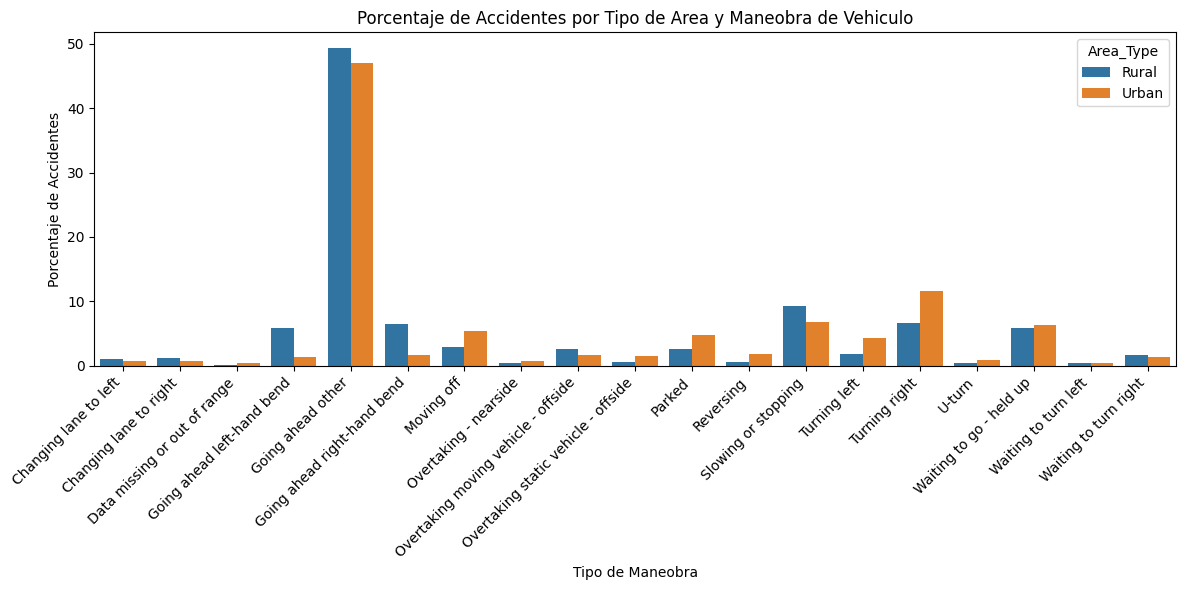

In [11]:
#2.6:))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#fusinamos vehiculos y accidentes como siempre
mergi=pd.merge(accidentes,vehiculos,on="Accident_Index")
# aca filtramos para eliminar el unallocated, y q solo sea entre urbano y rural
mergi = mergi[mergi["Urban_or_Rural_Area"].isin(["Urban", "Rural"])]

# reenombramos la columna directamente (sin mapear)
mergi["Area_Type"] = mergi["Urban_or_Rural_Area"]


#agrupamos y contamos los accidentes
maniobras_por_area=mergi.groupby(['Area_Type', 'Vehicle_Manoeuvre'])['Accident_Index'].count().reset_index()

#calculamos porcentajes de las maniobras por area
total=maniobras_por_area.groupby('Area_Type')['Accident_Index'].transform('sum')
maniobras_por_area['Porcentaje']=(maniobras_por_area['Accident_Index']/total)*100

#Ahora para visualizarlo vamos a crear un grafico estilo barplot
plt.figure(figsize=(12,6))
sns.barplot(x='Vehicle_Manoeuvre',y='Porcentaje',hue='Area_Type',data=maniobras_por_area)
plt.title("Porcentaje de Accidentes por Tipo de Area y Maneobra de Vehiculo")
plt.xlabel("Tipo de Maneobra")
plt.ylabel("Porcentaje de Accidentes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Luego de bastante trabajo, pude completar el grafico, estuve mucho tiempo imprimiendo bien el grafico pero resultaba vacio
#esto fue debido a que estaba mapeando valores numericos de si era zona urbana o rural y los transformaba en vacio ya que es string no numerico
#Le pedi ayuda a la IA con dos cosas, para que me ayude a encontrar el error, y tambien con que el grafico antes lo imprimia con una zona extra
#que es unallocated, y no sabia como sacar esa ya que solo debia hacer la comparacion entre rural y urbano, y me ayuda con
#la linea en donde se filtra para eliminarlo
#Se puede ver, a base del grafico que para partir, la maniobra que mas tiene accidentes, es going ahead other, osea adelantar.
#Luego, para zonas urbanas y rurales, se pueden ver algunas diferencias, la zona rural tiene el mayor porcentaje de accidentes adelantando,
#en las zonas urbanas ganan los accidentes mas chicos, como ir en reversa, girando a la derecha y izwquierda, esos mas de dia a dia.
#pero en las zonas rurales predominan los accidentes mas graves,que suelen ser en carreteras, como adelantar, u turn, desacelerando.
#Pero se puede ver que el tipo de maniobra con pronabilidad de accidente depende mucho de la zona donde sea esto,
#sea zona rural o urbana, ya que cambian muchas variables como el trafico, hora del dia, condiciones, etc.
